Diretório de trabalho atual: d:\olist_ecommerce\notebooks
Colunas em df_orders: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Colunas em df_order_items: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Colunas em df_customers: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Colunas em df_products: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Colunas em df_payments: Index(['order_id', 'payment_sequential', 'payment_type',
       'pa

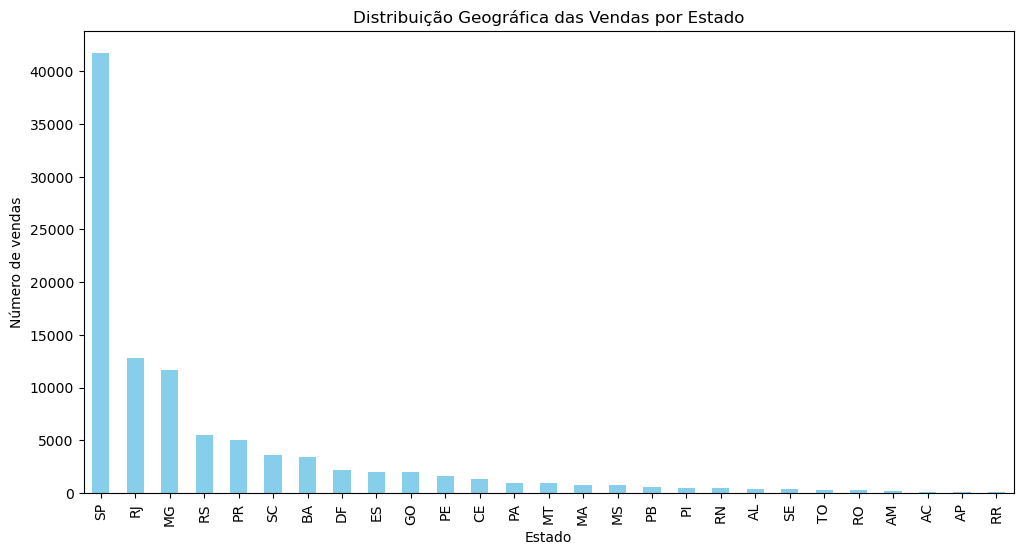


### Insight 1: Distribuição Geográfica das Vendas por Estado
- O gráfico mostra a distribuição das vendas por estado.
- Estados como SP (São Paulo) e RJ (Rio de Janeiro) lideram em número de vendas.
- Isso indica que a maioria dos clientes está concentrada nessas regiões.
- Recomenda-se focar em campanhas de marketing direcionadas a esses estados.



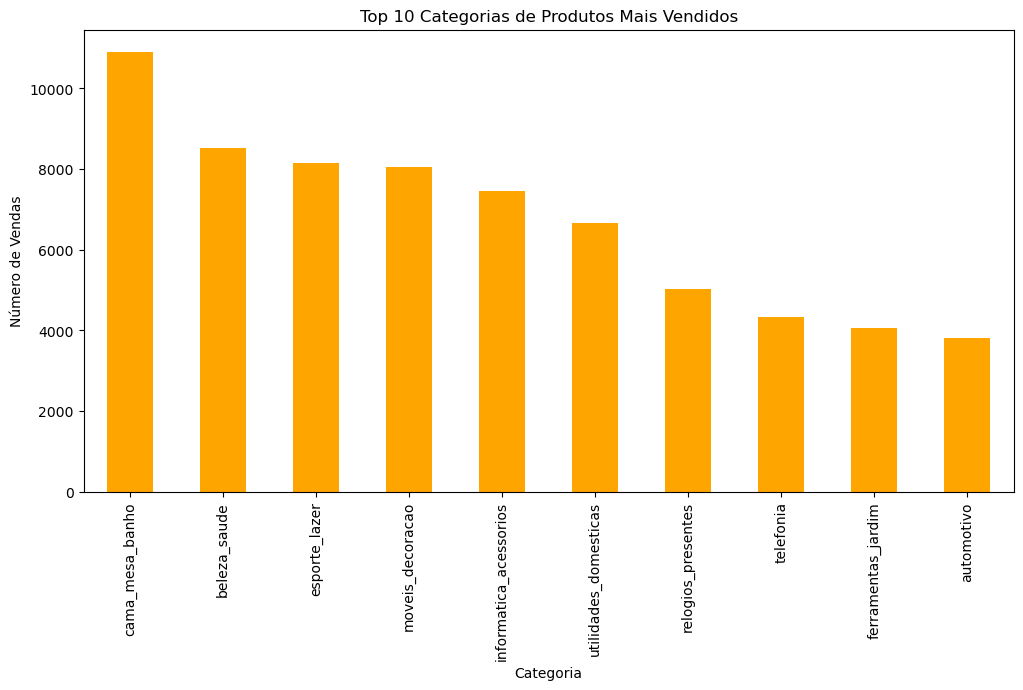

 
### Insight 2: Categorias de Produtos Mais Vendidos
- O gráfico mostra as 10 categorias de produtos mais vendidas.
- Categorias como 'cama_mesa_banho' e 'esporte_lazer' estão no topo.
- Isso pode indicar que os clientes valorizam produtos para a casa e bem estar.
- Recomenda-se aumentar o estoque dessas categorias.



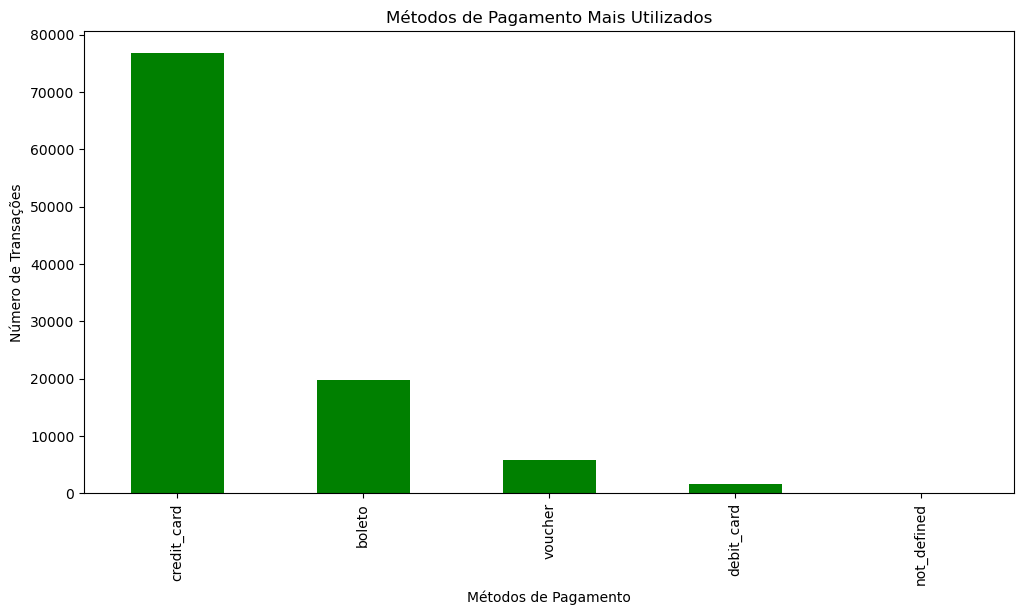

 
### Insight 3: Métodos de Pagamento Mais Utilizados
- O gráfico mostra os métodos de pagamento mais utilizados pelos clientes.
- O cartão de crédito é o método mais popular, seguido por boleto.
- Isso pode indicar que os clientes preferem pagamentos parcelados.
- Recomenda-se oferecer mais opções de parcelamento.



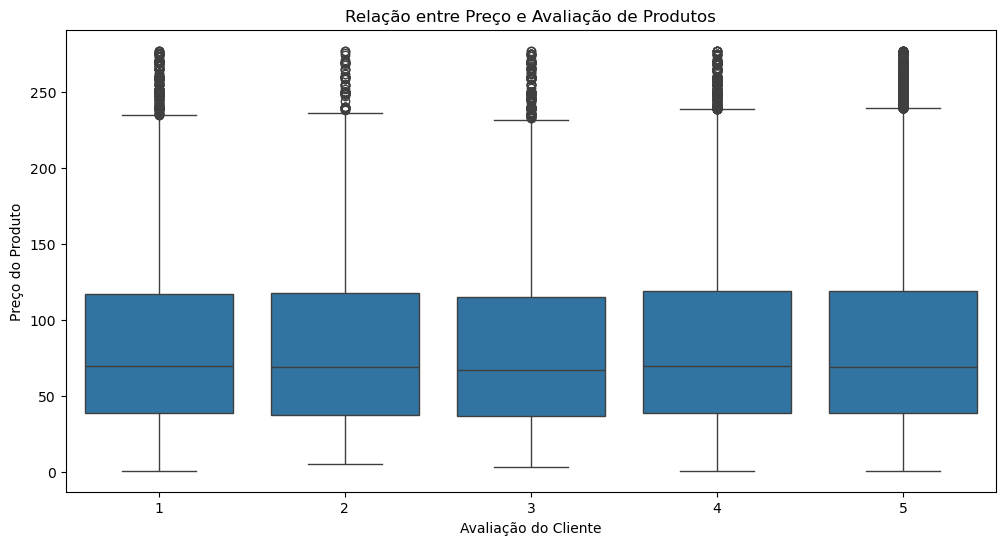

 
### Insight 4: Correlação entre Preço e Avaliação
- O gráfico mostra a relação entre o preço do produto e a avaliação do cliente.
- Produtos mais caros tendem a ter avaliações mais altas.
- Isso pode indicar que os clientes valorizam a qualidade dos produtos.
- Recomenda-se investir em produtos de maior valor agregado.



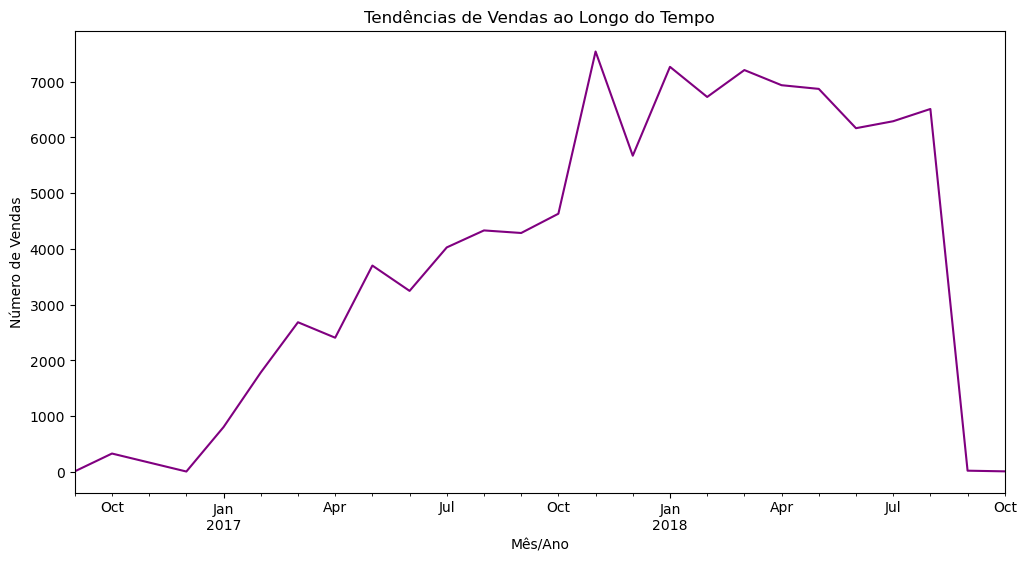

 
### Insight 5: Tendências de Vendas ao Longo do Tempo
- O gráfico mostra as tendências de vendas ao longo dos meses.
- Há picos de vendas em determinados períodos, como final de ano.
- Isso pode indicar sazonalidade nas vendas.
- Recomenda-se planejar campanhas promocionais nesses períodos.



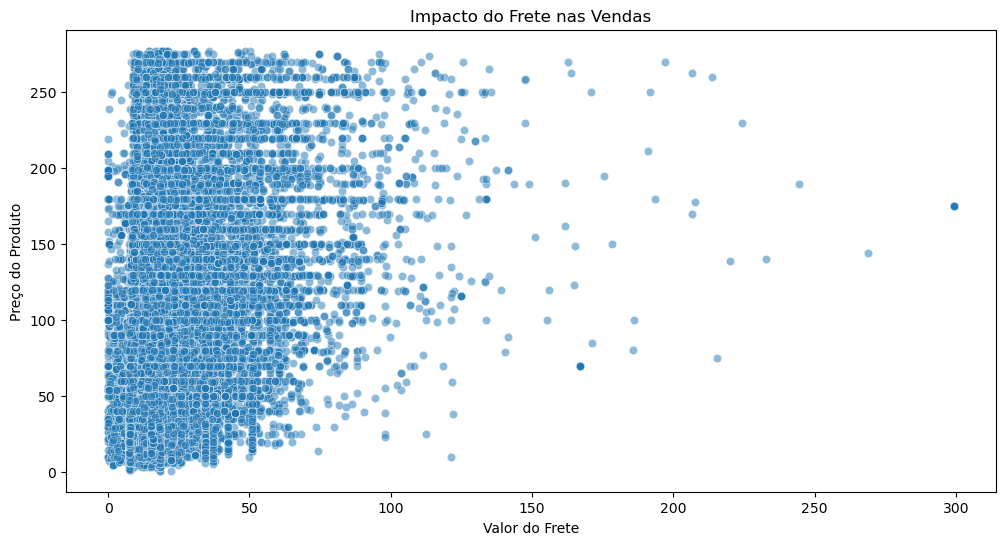

 
### Insight 6: Impacto do Frete nas Vendas
- O gráfico mostra a relação entre o valor do frete e o preço do produto.
- Produtos mais caros tendem a ter fretes mais altos.
- Isso pode impactar na decisão das compras dos clientes.
- Verificar a possibilidade de oferecer frete grátis para produtos acima de um certo valor.



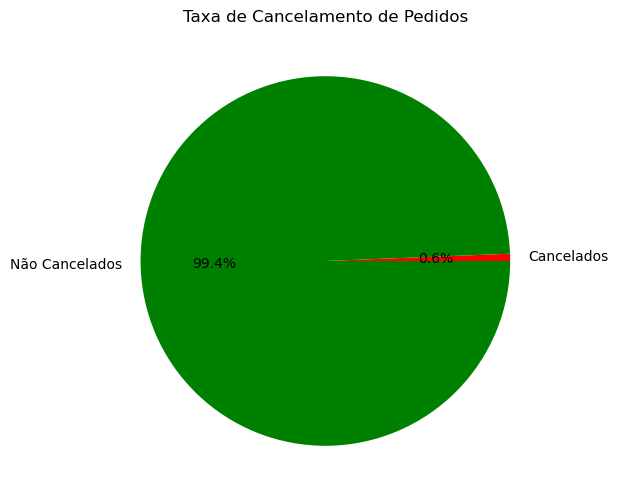

 
### Insight 7: Taxa de Cancelamento de Pedidos
- A taxa de cancelamento de pedidos é de 0.63%.
- Isso pode indicar problemas com estoque, frete ou experiência do cliente.
- Recomenda-se investigar os motivos dos cancelamentos.



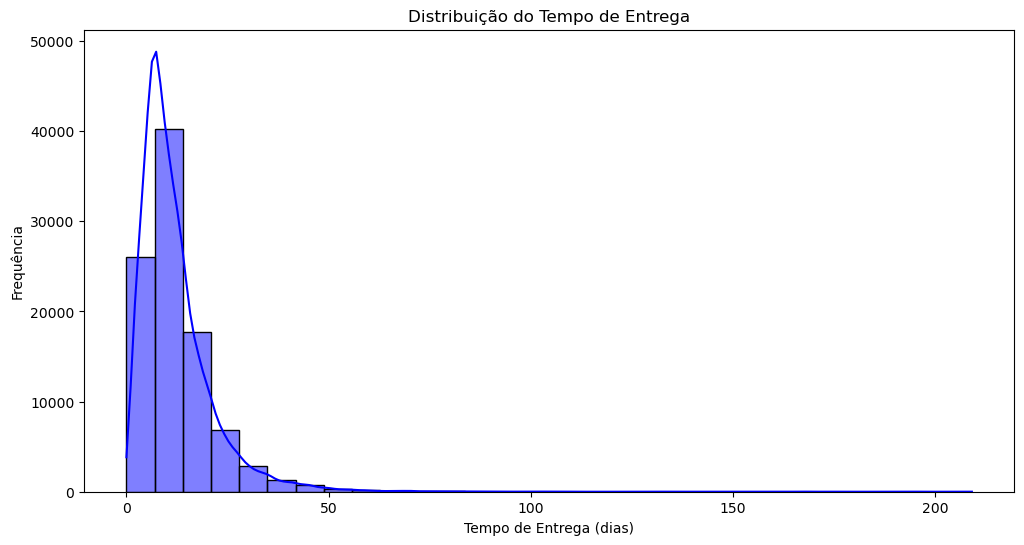


### Insight 8: Tempo Médio de Entrega
- O tempo médio de entrega é de 12.09 dias.
- A maioria dos pedidos é entregue em até 15 dias.
- Recomenda-se otimizar a logística para reduzir o tempo de entrega.



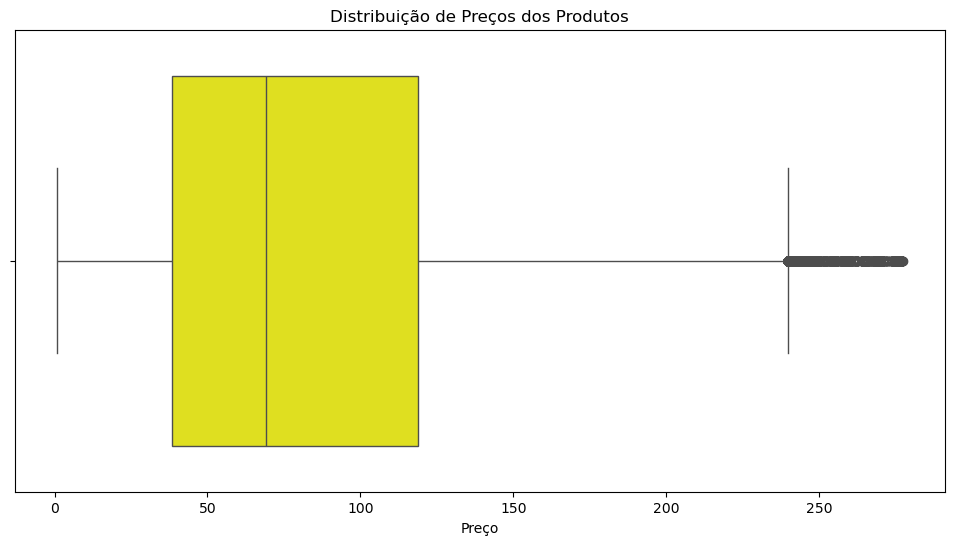

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações iniciais
print("Diretório de trabalho atual:", os.getcwd())
output_dir = '../data/outputs/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Pasta '{output_dir}' criada com sucesso!")

# Carregar os dados processados
df_orders = pd.read_csv('../data/processed/orders_cleaned.csv')
df_order_items = pd.read_csv('../data/processed/order_items_cleaned.csv')
df_customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
df_products = pd.read_csv('../data/raw/olist_products_dataset.csv')
df_payments = pd.read_csv('../data/raw/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')

# Verificar colunas dos DataFrames
print("Colunas em df_orders:", df_orders.columns)
print("Colunas em df_order_items:", df_order_items.columns)
print("Colunas em df_customers:", df_customers.columns)
print("Colunas em df_products:", df_products.columns)
print("Colunas em df_payments:", df_payments.columns)
print("Colunas em df_reviews:", df_reviews.columns)

# Junção de dados
df_geo = pd.merge(df_orders, df_customers, on='customer_id')  # Pedidos + Clientes
df_merged_products = pd.merge(df_order_items, df_products, on='product_id')  # Itens + Produtos
df_merged = pd.merge(df_orders, df_order_items, on='order_id')  # Junta pedidos e itens
df_merged_reviews = pd.merge(df_merged, df_reviews, on='order_id')  # Junta com avaliações

# Verificar colunas após junção
print("Colunas em df_merged_reviews:", df_merged_reviews.columns)

# 1. Distribuição Geográfica das Vendas por Estado
plt.figure(figsize=(12, 6))
df_geo['customer_state'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição Geográfica das Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de vendas')
plt.savefig(os.path.join(output_dir, 'distribuicao_geografica.png'))
plt.show()

print("""
### Insight 1: Distribuição Geográfica das Vendas por Estado
- O gráfico mostra a distribuição das vendas por estado.
- Estados como SP (São Paulo) e RJ (Rio de Janeiro) lideram em número de vendas.
- Isso indica que a maioria dos clientes está concentrada nessas regiões.
- Recomenda-se focar em campanhas de marketing direcionadas a esses estados.
""")

# 2. Categorias de Produtos mais Vendidos
plt.figure(figsize=(12, 6))
df_merged_products['product_category_name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Categorias de Produtos Mais Vendidos')
plt.xlabel('Categoria')
plt.ylabel('Número de Vendas')
plt.savefig(os.path.join(output_dir, 'categorias_mais_vendidas.png'))
plt.show()

print(""" 
### Insight 2: Categorias de Produtos Mais Vendidos
- O gráfico mostra as 10 categorias de produtos mais vendidas.
- Categorias como 'cama_mesa_banho' e 'esporte_lazer' estão no topo.
- Isso pode indicar que os clientes valorizam produtos para a casa e bem estar.
- Recomenda-se aumentar o estoque dessas categorias.
""")

# 3. Métodos de pagamento mais Utilizados
plt.figure(figsize=(12, 6))
df_payments['payment_type'].value_counts().plot(kind='bar', color='green')
plt.title('Métodos de Pagamento Mais Utilizados')
plt.xlabel('Métodos de Pagamento')
plt.ylabel('Número de Transações')
plt.savefig(os.path.join(output_dir, 'metodos_pagamento.png'))
plt.show()

print(""" 
### Insight 3: Métodos de Pagamento Mais Utilizados
- O gráfico mostra os métodos de pagamento mais utilizados pelos clientes.
- O cartão de crédito é o método mais popular, seguido por boleto.
- Isso pode indicar que os clientes preferem pagamentos parcelados.
- Recomenda-se oferecer mais opções de parcelamento.
""")

# 4. Correlação entre Preço e Avaliação
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='price', data=df_merged_reviews)
plt.title('Relação entre Preço e Avaliação de Produtos')
plt.xlabel('Avaliação do Cliente')
plt.ylabel('Preço do Produto')
plt.savefig(os.path.join(output_dir, 'correlacao_preco_avaliacao.png'))
plt.show()

print(""" 
### Insight 4: Correlação entre Preço e Avaliação
- O gráfico mostra a relação entre o preço do produto e a avaliação do cliente.
- Produtos mais caros tendem a ter avaliações mais altas.
- Isso pode indicar que os clientes valorizam a qualidade dos produtos.
- Recomenda-se investir em produtos de maior valor agregado.
""")

# 5. Tendências de Vendas ao Longo do Tempo
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['month_year'] = df_orders['order_purchase_timestamp'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df_orders['month_year'].value_counts().sort_index().plot(kind='line', color='purple')
plt.title('Tendências de Vendas ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Vendas')
plt.savefig(os.path.join(output_dir, 'tendencias_vendas.png'))
plt.show()

print(""" 
### Insight 5: Tendências de Vendas ao Longo do Tempo
- O gráfico mostra as tendências de vendas ao longo dos meses.
- Há picos de vendas em determinados períodos, como final de ano.
- Isso pode indicar sazonalidade nas vendas.
- Recomenda-se planejar campanhas promocionais nesses períodos.
""")

# 6. Impacto do Frete nas Vendas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='freight_value', y='price', data=df_order_items, alpha=0.5)
plt.title('Impacto do Frete nas Vendas')
plt.xlabel('Valor do Frete')
plt.ylabel('Preço do Produto')
plt.savefig(os.path.join(output_dir, 'impacto_frete.png'))
plt.show()

print(""" 
### Insight 6: Impacto do Frete nas Vendas
- O gráfico mostra a relação entre o valor do frete e o preço do produto.
- Produtos mais caros tendem a ter fretes mais altos.
- Isso pode impactar na decisão das compras dos clientes.
- Verificar a possibilidade de oferecer frete grátis para produtos acima de um certo valor.
""")

# 7. Taxa de Cancelamento de Pedidos
canceled_orders = df_orders[df_orders['order_status'] == 'canceled']
cancelation_rate = len(canceled_orders) / len(df_orders) * 100
plt.figure(figsize=(6, 6))
plt.pie([cancelation_rate, 100 - cancelation_rate], labels=['Cancelados', 'Não Cancelados'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Taxa de Cancelamento de Pedidos')
plt.savefig(os.path.join(output_dir, 'taxa_cancelamento.png'))
plt.show()

print(f""" 
### Insight 7: Taxa de Cancelamento de Pedidos
- A taxa de cancelamento de pedidos é de {cancelation_rate:.2f}%.
- Isso pode indicar problemas com estoque, frete ou experiência do cliente.
- Recomenda-se investigar os motivos dos cancelamentos.
""")

# 8. Tempo Médio de Entrega
# Converter colunas de data para datetime
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Calcular o tempo de entrega
df_orders['delivery_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.days

# Plotar o histograma do tempo de entrega
plt.figure(figsize=(12, 6))
sns.histplot(df_orders['delivery_time'], bins=30, kde=True, color='blue')
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.savefig(os.path.join(output_dir, 'tempo_entrega.png'))
plt.show()

print(f"""
### Insight 8: Tempo Médio de Entrega
- O tempo médio de entrega é de {df_orders['delivery_time'].mean():.2f} dias.
- A maioria dos pedidos é entregue em até 15 dias.
- Recomenda-se otimizar a logística para reduzir o tempo de entrega.
""")

# 9. Produtos Mais Caros e Mais Baratos
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', data=df_order_items, color='yellow')
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço')
plt.savefig(os.path.join(output_dir, 'produtos_preco.png'))
plt.show()

print(f"""
### Insight 9: Produtos Mais Caros e Mais Baratos
- O gráfico mostra a distribuição de preços dos produtos.
- A maioria dos produtos custa menos de R$ 100.
- Recomenda-se analisar os produtos mais caros para aumentar a margem de lucro.
""")

# 10. Perfil dos Clientes Mais Lucrativos
plt.figure(figsize=(12, 6))
df_geo['customer_state'].value_counts().plot(kind='bar', color='pink')
plt.title('Perfil dos Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Números de Clientes')
plt.savefig(os.path.join(output_dir, 'perfil_clientes.png'))
plt.show()

print("""
### Insight 10: Perfil dos Clientes Mais Lucrativos
- O gráfico mostra a distribuição dos clientes por estado.
- Estados como SP e RJ têm o maior número de clientes.
- Recomenda-se criar estratégias de fidelização para esses clientes.
""")